<br>
<img src="data/logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Amed Coulibaly</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Data Mining</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen"> ** Analyse en composante principale ** </span></div><br>
<hr>

## Importation des modules et packages

In [1]:
#Importation des modules et packages 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

## Lecture des bases de données

In [2]:
# Lecture de la base consommation
table = pd.read_csv('data/données.csv', index_col=0)

In [3]:
# Caractéristiques de la table
print('La base de données a ', table.shape[0], 'lignes et ', table.shape[1], 'colones.')

La base de données a  100 lignes et  84 colones.


# ACP

Comme nous l'avons constaté dans la partie précédente, nous avons énormément de variables qui sont corrélées entre elles. Nous allons dans cette partie procédée à une méthode de réduction de facteurs.

## Aperçu et traitement des données

### Définition

L'objectif de l'ACP est de pouvoir reduire au maximum l'information contenu dans un jeu de données de $p$ colonnes à un nombre de colonnes $m$ beaucoup plus petit que $p$.

L'ACP est utilisé uniquement sur des données quantitatives. Nous allons donc utiliser une base de données dans laquelle nous exluons les variables 'object'.

Cette méthode est utilisé pour :
- Reduire le nombre de variables sans perdre d'information dans le jeu de donnée
- Visualiser simplement la distance entre les observations d'un jeu de données
- Comme le nombre de variables diminue, cela simplifie les analyses ultérieures


### Centrage - Réduction

Ici toutes nos variables ne sont pas à la même unité. Il conviendra donc de les normaliser (centrer réduire) avant d'appliquer l'ACP à notre jeu de données.

On peut pour cela utiliser la classe `StandardScaler` de scikit learn. 

Nous instancions l’objet et nous l’appliquons sur la matrice $X$. Nous obtenons une matrice $Z$ telle que
$$z_i^j=\frac{x_i^j-\bar{x}^j}{s_j}$$
où $\bar{x}^j=\frac1n\sum_{i=1}^nx_i^j$ est la moyenne de la variable $X^j$ et $s_j=\sqrt{\frac1n\sum_{i=1}^n\left(x_i^j-\bar{x}^j\right)^2}$ son écart-type.

In [4]:
# creer une variable X numpy contenant les vecteurs numeriques
X=np.array(table)

#instanciation de la classe StandardScaler, MinMaxScaler, RobustScaler, Normalizer

sc = StandardScaler().fit(X)

#transformation – centrage-réduction
X_scaled = sc.transform(X)

In [5]:
list_var = table.columns
list_var

Index(['HT22', 'HT022', 'HT122', 'HT222', 'HT322', 'HT422', 'HT522', 'HTCH22',
       'HTCH022', 'HTCH122', 'HTCH222', 'HTCH322', 'HTCH422', 'HTCH522',
       'CPG22', 'CPG022', 'CPG122', 'CPG222', 'CPG322', 'CPG422', 'CPG522',
       'CPGE22', 'CPGE022', 'CPGE122', 'CPGE222', 'CPGE322', 'CPGE422',
       'CPGE522', 'CPGEL22', 'CPGEL022', 'CPGEL122', 'CPGEL222', 'CPGEL322',
       'CPGEL422', 'CPGEL522', 'CPGEO22', 'CPGEO022', 'CPGEO122', 'CPGEO222',
       'CPGEO322', 'CPGEO422', 'CPGEO522', 'VV22', 'VVUH22', 'VVLIT22', 'RT22',
       'RTUH22', 'RTLIT22', 'AJCS22', 'AJCSUH22', 'AJCSLIT22', 'PMUN19',
       'PMUN18', 'PMUN17', 'PMUN16', 'PMUN15', 'PMUN14', 'PMUN13', 'PMUN12',
       'PMUN11', 'PMUN10', 'PMUN09', 'PMUN08', 'PMUN07', 'PMUN06', 'PSDC99',
       'PSDC90', 'PSDC82', 'PSDC75', 'PSDC68', 'PSDC62', 'PTOT54', 'PTOT36',
       'PTOT1931', 'PTOT1926', 'PTOT1921', 'PTOT1911', 'PTOT1906', 'PTOT1901',
       'PTOT1896', 'PTOT1891', 'PTOT1886', 'PTOT1881', 'PTOT1876'],
      dtype='o

In [6]:
n, p = X_scaled.shape
print(n, p)

100 84


In [7]:
# Calculer la variance et la moyenne des du vecteur X
variance = np.var(X_scaled)
moyenne = X_scaled.mean()

print('variance : ', variance)
print('moyenne : ', moyenne)

variance :  1.0
moyenne :  5.233908544661453e-18


## PCA avec Scikit-learn

### Instanciation et entrainement

Nous instancions dans un premier temps l’objet `PCA` et nous analysons ses propriétés.

In [8]:
#instanciation
acpX = PCA()

In [9]:
acpX.fit(X_scaled)

PCA()

### Nouvelles colonnes obtenues

In [10]:
# Coordonnées des nouvelles colonnes obtenues grâce à l'ACP
coordX = acpX.transform(X_scaled)

In [11]:
# Dimension
coordX.shape

(100, 84)

In [12]:
## Stockage des nouvelles colonnes en dataframe
table_new = pd.DataFrame(coordX,index=table.index, columns=[f'pca_{i}' for i in range(1,85)])
table_new.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84
libelle_departement,,,,,,,,,,,,,,,,,,,,,
Ain,-1.823201,-1.361873,-0.512751,-0.218841,-0.384796,-0.162570,-0.070550,-0.426169,0.112729,-0.055866,...,-2.276717e-15,3.962571e-17,9.102327e-17,-4.379940e-16,3.717323e-16,-6.606381e-17,-1.149136e-16,1.114576e-16,-2.992699e-17,8.046339e-16
Aisne,-1.659829,-3.081866,-0.916500,1.023012,-0.941850,0.528471,1.574992,0.689068,-0.247391,-0.671102,...,-4.196441e-16,6.508022e-16,-4.089705e-16,1.307720e-16,3.166068e-16,2.433905e-17,5.985247e-17,6.927963e-17,-2.788584e-16,-1.092652e-16
Allier,-2.774993,-0.778920,0.268605,2.512877,0.979539,-0.723045,0.445472,-1.057403,0.931574,-0.316666,...,4.501968e-16,-4.999837e-16,-2.264629e-16,1.770345e-16,1.092892e-16,-1.906895e-16,2.449861e-16,6.626650e-17,-4.379655e-16,-6.848249e-16
Alpes-Maritimes,5.619001,-1.619881,4.847584,-3.557199,0.066141,-0.260149,-3.680622,-1.222465,-1.794076,-0.669464,...,6.788451e-16,9.554474e-16,-2.440552e-16,9.793848e-16,8.704320e-16,-6.418144e-16,-1.088542e-15,-9.204040e-18,-5.354139e-16,-9.498065e-16
Alpes-de-Haute-Provence,-4.798994,3.069879,1.487885,0.561082,0.600042,-0.663331,-1.092946,-0.538713,1.084396,0.231328,...,9.885959e-16,-7.923901e-18,1.197383e-16,-1.303907e-16,6.691317e-16,-2.812868e-16,-2.230824e-17,3.919495e-16,3.874811e-17,8.839665e-16


<AxesSubplot:>

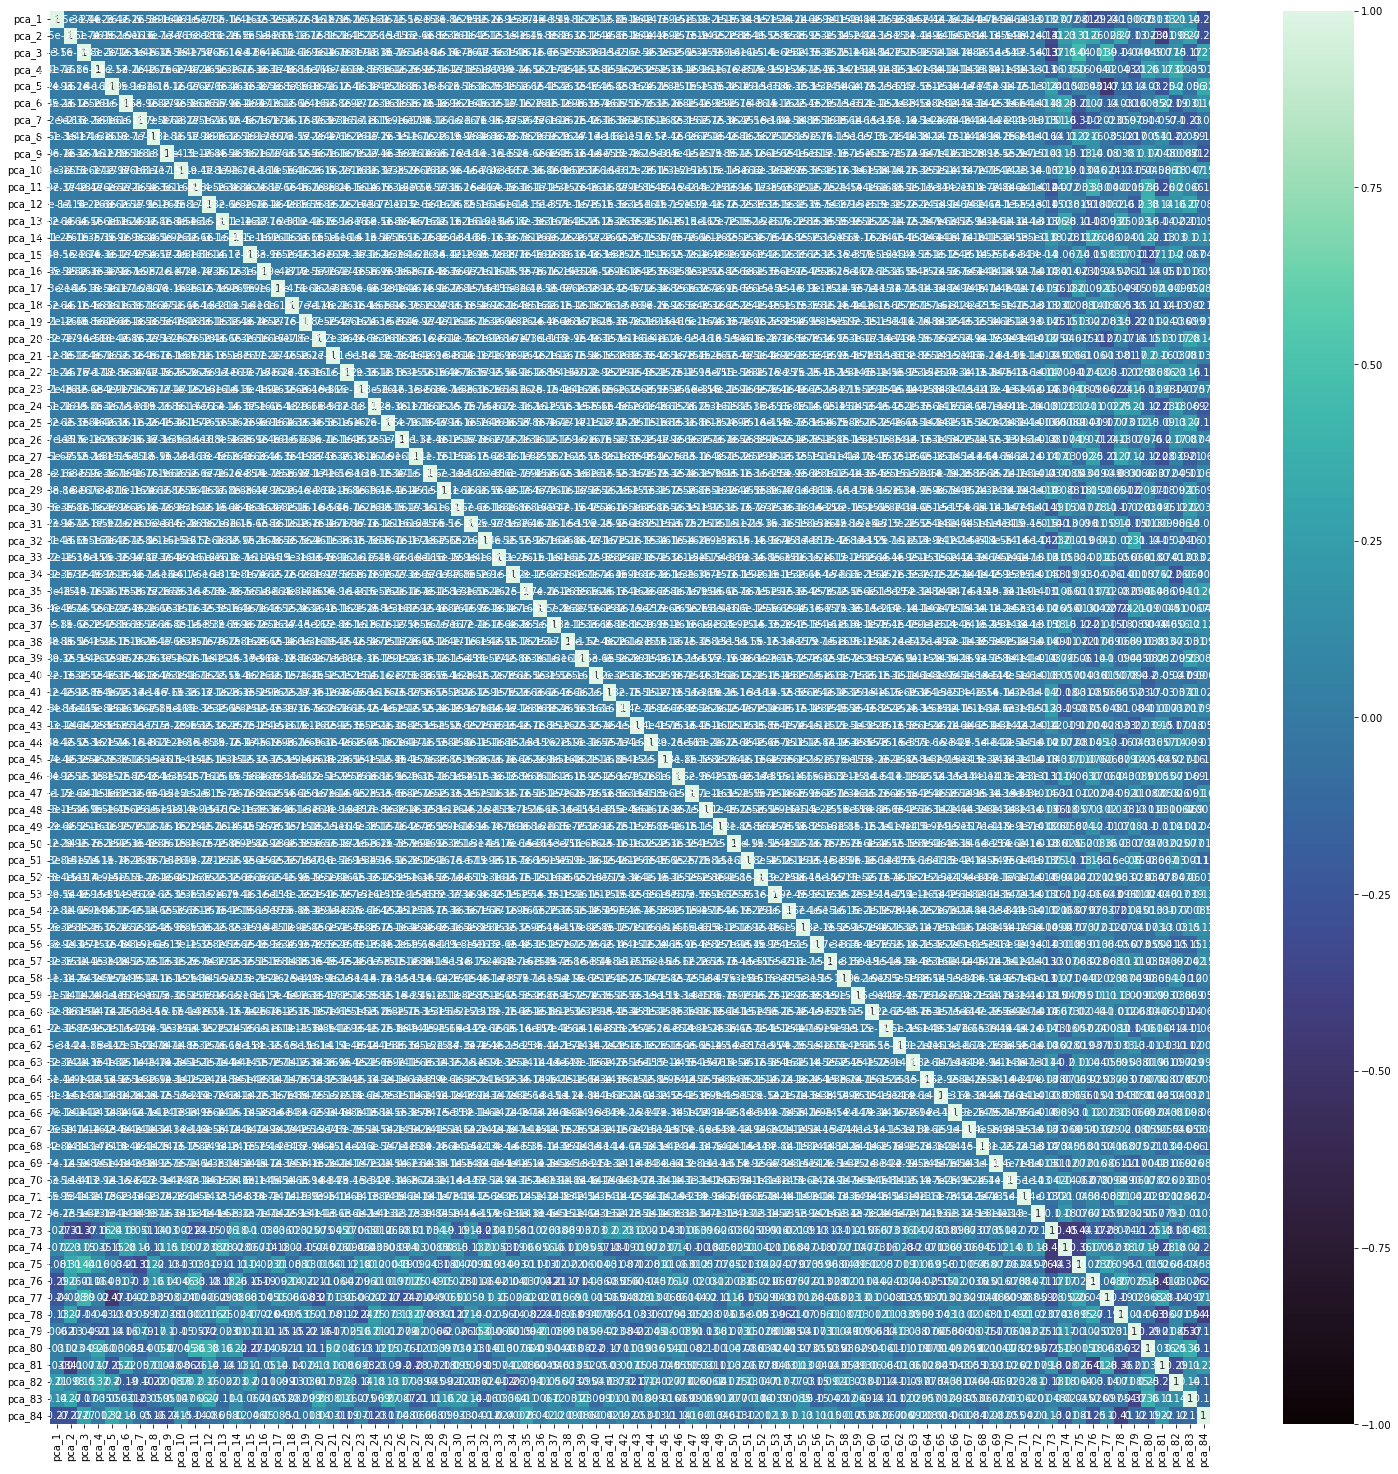

In [13]:
# Calculer la correlation entre les nouvelles variables obtenue
matrice_corr = table_new.corr()

# Afficher un heatmap de la matrice de correlation 
plt.rcParams['figure.figsize'] = 26, 26
sns.heatmap(matrice_corr,
           annot=True,
           cmap=sns.cm.mako,
           vmin=-1,vmax=1)

Les nouvelles variables obtenues ne sont pas corrélées entre elles. Elles sont indépendantes les unes des autres.

## Valeurs propres et pourcentages d'inertie expliquée

On retrouve les valeurs propres à l'aide la fonction `explained_variance_` dans l'ACP

Nous enregistrons ces valeurs dans la variable `Val_propX` pour les conserver.

In [14]:
Val_propX=acpX.explained_variance_
Val_propX

array([3.84686576e+01, 2.04803155e+01, 8.46040582e+00, 5.23386599e+00,
       3.40534698e+00, 1.94694716e+00, 1.30972111e+00, 8.52906264e-01,
       7.69453675e-01, 6.58232189e-01, 4.14757663e-01, 3.98430832e-01,
       3.59522596e-01, 3.14355348e-01, 2.92885978e-01, 2.31051327e-01,
       1.92286429e-01, 1.78396432e-01, 1.26933140e-01, 1.12469811e-01,
       9.53794375e-02, 7.76270569e-02, 6.91351163e-02, 6.01998021e-02,
       5.15665332e-02, 4.30802142e-02, 3.80314101e-02, 2.72271767e-02,
       2.59520264e-02, 2.49316191e-02, 1.96162582e-02, 1.62557836e-02,
       1.58231221e-02, 1.43880151e-02, 1.10618650e-02, 9.41317947e-03,
       7.95410672e-03, 7.31910634e-03, 6.92857048e-03, 5.14424385e-03,
       3.33696775e-03, 2.87082420e-03, 2.13222493e-03, 1.75503967e-03,
       1.23862867e-03, 8.99514836e-04, 7.98507516e-04, 4.30106160e-04,
       3.59570384e-04, 1.75711067e-04, 1.36160426e-04, 8.11139536e-05,
       7.70425231e-05, 5.46406044e-05, 4.12358638e-05, 3.16172678e-05,
      

On s'interesse surtout au pourcentage d'inerte expliqué par chaque axe que l'on peut retrouver à l'aide de la fontion `explained_variance_ratio_`. On enregistre également les résultats dans la variable `inertie_explique`

In [15]:
inertie_explique=acpX.explained_variance_ratio_
inertie_explique

array([4.53380607e-01, 2.41375147e-01, 9.97119257e-02, 6.16848491e-02,
       4.01344465e-02, 2.29461630e-02, 1.54359988e-02, 1.00521095e-02,
       9.06856117e-03, 7.75773651e-03, 4.88821532e-03, 4.69579194e-03,
       4.23723059e-03, 3.70490232e-03, 3.45187045e-03, 2.72310492e-03,
       2.26623292e-03, 2.10252938e-03, 1.49599772e-03, 1.32553706e-03,
       1.12411480e-03, 9.14890313e-04, 8.14806727e-04, 7.09497668e-04,
       6.07748427e-04, 5.07731096e-04, 4.48227333e-04, 3.20891726e-04,
       3.05863168e-04, 2.93836940e-04, 2.31191614e-04, 1.91586021e-04,
       1.86486796e-04, 1.69573036e-04, 1.30371980e-04, 1.10941044e-04,
       9.37448292e-05, 8.62608961e-05, 8.16581521e-05, 6.06285883e-05,
       3.93285484e-05, 3.38347138e-05, 2.51297939e-05, 2.06843961e-05,
       1.45981236e-05, 1.06014249e-05, 9.41098144e-06, 5.06910832e-06,
       4.23779382e-06, 2.07088043e-06, 1.60474787e-06, 9.55985882e-07,
       9.08001166e-07, 6.43978551e-07, 4.85994109e-07, 3.72632084e-07,
      

In [16]:
for x in range(10):
    print(f"Les {x+1} premiers axe expliquent {sum(acpX.explained_variance_ratio_[:x+1])*100:.2f}% de la variance totale")

Les 1 premiers axe expliquent 45.34% de la variance totale
Les 2 premiers axe expliquent 69.48% de la variance totale
Les 3 premiers axe expliquent 79.45% de la variance totale
Les 4 premiers axe expliquent 85.62% de la variance totale
Les 5 premiers axe expliquent 89.63% de la variance totale
Les 6 premiers axe expliquent 91.92% de la variance totale
Les 7 premiers axe expliquent 93.47% de la variance totale
Les 8 premiers axe expliquent 94.47% de la variance totale
Les 9 premiers axe expliquent 95.38% de la variance totale
Les 10 premiers axe expliquent 96.15% de la variance totale


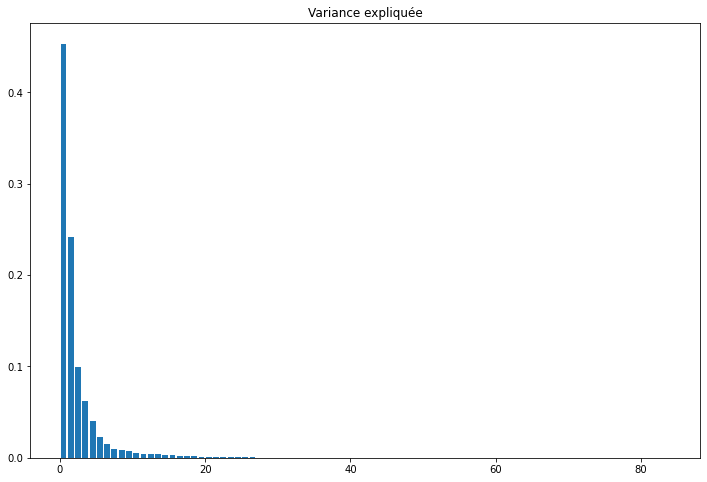

In [17]:
plt.figure(figsize = (12, 8))
plt.bar(np.arange(len(acpX.explained_variance_ratio_)) + 0.5,
        acpX.explained_variance_ratio_)
plt.title("Variance expliquée");

## Représentation graphique des individus

In [18]:
# Identification des limites des axes
print('min', table_new.min().min())
print('max', table_new.max().max())

min -11.138923935530537
max 35.875786354533524


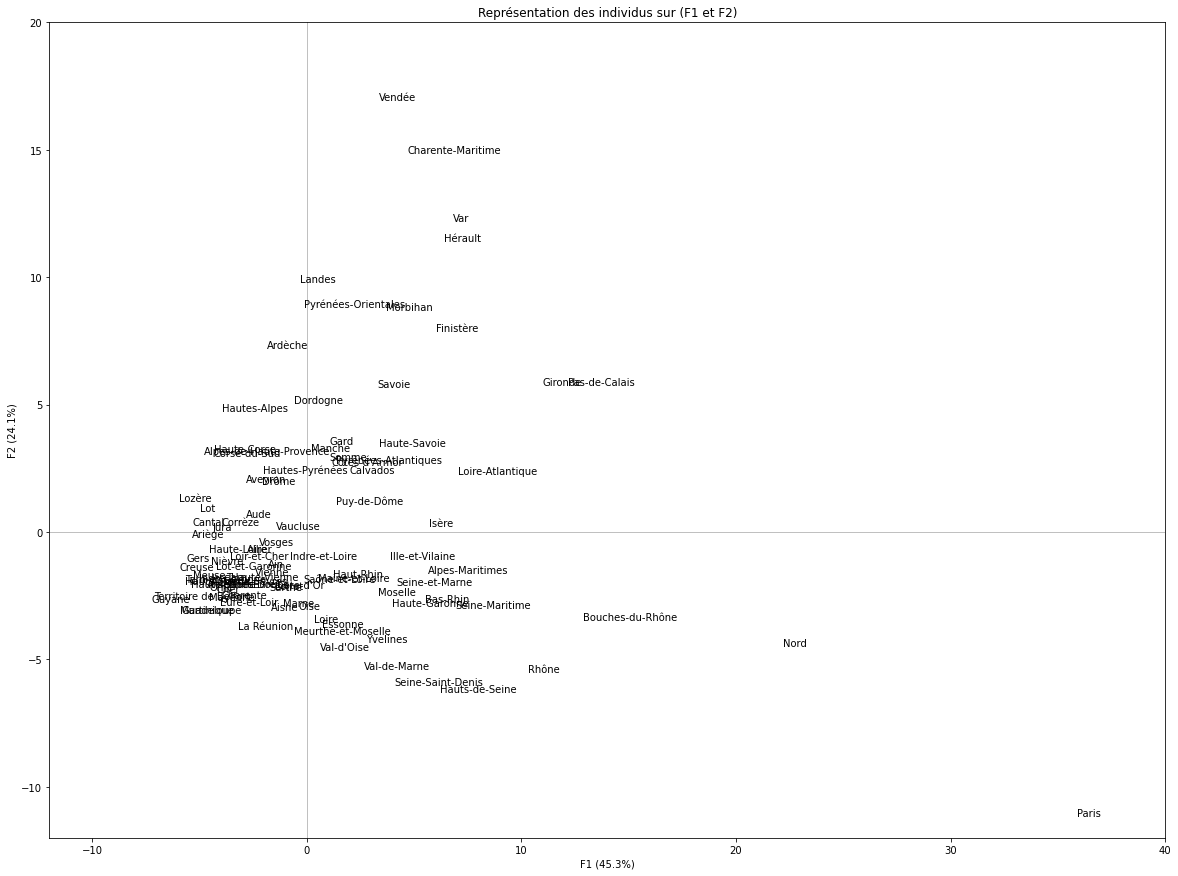

In [20]:
# Representer graphiquement les departements sur les deux premieres composante de l'acp

fig, axes = plt.subplots(figsize=(20,15))
axes.set_xlim(-12,40) #limites en abcisse
axes.set_ylim(-12,20)  #limites en ordonnées

#placement des étiquettes des observations
for i in range(n): # lignes 
    plt.plot(coordX[i,0],coordX[i,1])
    plt.annotate(table.index[i],(coordX[i,0],coordX[i,1]))
    
#ajouter les axes
plt.plot([-12,40],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-12,20],color='silver',linestyle='-',linewidth=1)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*acpX.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*acpX.explained_variance_ratio_[1],1)))

plt.title("Représentation des individus sur (F{} et F{})".format(1, 2))
plt.show()

Réalisons un zoom sur la zone concentrée.

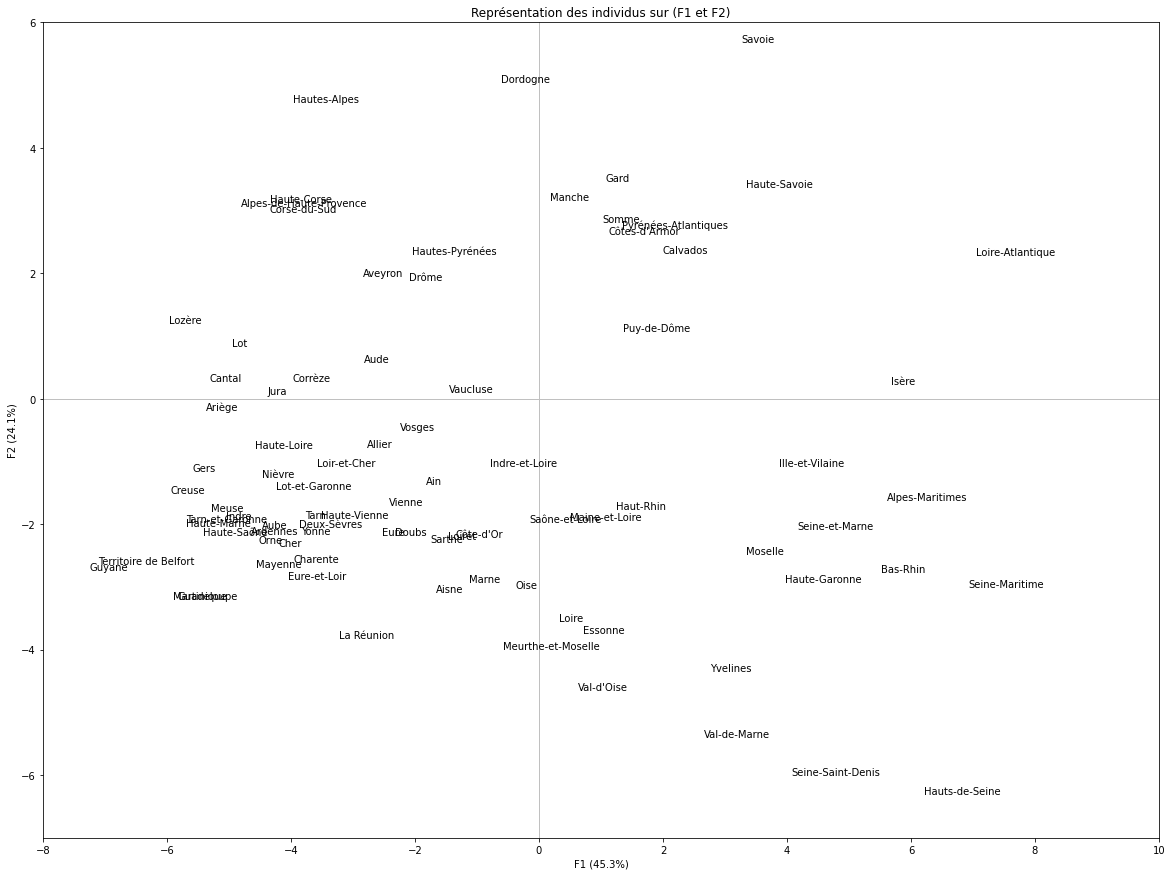

In [21]:
# Representer graphiquement les departements sur les deux premieres composante de l'acp

fig, axes = plt.subplots(figsize=(20,15))
axes.set_xlim(-8,10) #limites en abcisse
axes.set_ylim(-7,6)  #limites en ordonnées

#placement des étiquettes des observations
for i in range(n): # lignes 
    plt.plot(coordX[i,0],coordX[i,1])
    plt.annotate(table.index[i],(coordX[i,0],coordX[i,1]))
    
#ajouter les axes
plt.plot([-8,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,6],color='silver',linestyle='-',linewidth=1)
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*acpX.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*acpX.explained_variance_ratio_[1],1)))

plt.title("Représentation des individus sur (F{} et F{})".format(1, 2))
plt.show()

<img src="data/Carte_France.jpg"></span>

La carte des départements de la France nous aide à identifier les différences entre les départements et mieux expliquer les axes.
* L'axe 1 (y) sépare les départements limitrophes aux départements enclavés. Par exemple le département Vendée est situé près de la mer tandis que le Val-d'Oise est en banlieue parisienne.
* L'axe 2 (x) sépare les départements les plus peuplés et connus par rapport aux moins connus. 

De ce fait, la position de Paris est tout à fait compréhensible. C'est une ville enclavée avec une grande population.

## Interprétation: Représentation des variables et contributions aux axes

On peut retrouver les vecteurs propres dans l'acp à l'aide de `.components_`. Ces vecteurs propres représentent les coordonnées des nouvelles variables en fonction des anciennes: attention, les facteurs sont en ligne, les variables en colonne.

On veut représentater les anciennes variables dans le plan factoriel. On cherche donc leurs corrélations avec les nouvelles variables et on les représente grâce à ces deux coordonnées grâce à la formule:

$$ Cor(Z_k,V_j)=\frac{\sqrt{\lambda_k}a_{k,j}}{\sqrt{Var(V_j)}} $$


Lorsqu'on réalise une ACP, il est absolument nécessaire de décrire les axes à partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le cercle des corrélations. 

**Calcul des corrélations**

In [22]:
# Creer une dataframe contenant 3 colonnes ( variable / correlation axe1 / correlation ax2)

correlations_axe1 = []
correlations_axe2 = []

for i,feat in enumerate(table.columns):
    corr_axe1 = np.corrcoef(X_scaled[:,i],table_new['pca_1'].values)[0][1]
    corr_axe2 = np.corrcoef(X_scaled[:,i],table_new['pca_2'].values)[0][1]
    correlations_axe1.append(corr_axe1)
    correlations_axe2.append(corr_axe2)
    
df_coord = pd.DataFrame({'id': table.columns, 'corr_axe1': correlations_axe1, 'corr_axe2': correlations_axe2})

In [23]:
print("**Les variables les plus corrélées à l'axe 1**")
df_coord.sort_values(by = 'corr_axe1', ascending = False).head(10)

**Les variables les plus corrélées à l'axe 1**


,id,corr_axe1,corr_axe2
71,PTOT54,0.931093,-0.252820
72,PTOT36,0.930529,-0.226819
73,PTOT1931,0.926791,-0.225487
70,PSDC62,0.925444,-0.278487
69,PSDC68,0.919800,-0.283216
74,PTOT1926,0.918949,-0.208086
75,PTOT1921,0.909135,-0.196480
68,PSDC75,0.904358,-0.280489
67,PSDC82,0.901982,-0.262068
66,PSDC90,0.896769,-0.250667


In [24]:
print("**Les variables les plus corrélées à l'axe 2**")
df_coord.sort_values(by = 'corr_axe2', ascending = False).head(5)

**Les variables les plus corrélées à l'axe 2**


,id,corr_axe1,corr_axe2
35,CPGEO22,0.215000,0.923152
14,CPG22,0.224699,0.923149
21,CPGE22,0.289608,0.922800
25,CPGE322,0.273721,0.910441
39,CPGEO322,0.187451,0.881316


In [25]:
df_coord.sort_values(by = 'corr_axe2').head(10)

,id,corr_axe1,corr_axe2
69,PSDC68,0.919800,-0.283216
68,PSDC75,0.904358,-0.280489
70,PSDC62,0.925444,-0.278487
67,PSDC82,0.901982,-0.262068
12,HTCH422,0.749265,-0.255528
71,PTOT54,0.931093,-0.252820
66,PSDC90,0.896769,-0.250667
65,PSDC99,0.892811,-0.234824
72,PTOT36,0.930529,-0.226819
73,PTOT1931,0.926791,-0.225487


Comme nous l'avions dit au travers de la lecture de la représentation des départements sur les deux axes principaux de l'ACP:
* Les variables les plus corrélées à l'axe 1 sont: Relatives à La population
* Les variables les plus corrélées à l'axe 2 sont: Relatives au tourisme